# Инициализация проекта


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline # Конвейер
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Ridge, Lasso, ElasticNetCV # Модели для обучения
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler # Стандартизация
from sklearn.model_selection import train_test_split # Разделение выборки
from sklearn.preprocessing import PolynomialFeatures # Полиномиальная регрессия
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.svm import SVC
from math import sqrt

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])

In [ ]:
df = pd.concat([
    pd.read_csv('winequality-white.csv', sep=';'),
    pd.read_csv('winequality-red.csv', sep=';')]
)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df.isna().sum() #Проеврка пропущенных значений

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


In [ ]:
df.duplicated().sum()

1179

In [ ]:
df.drop_duplicates(inplace=True) #Удаление всех дупликатов
df.duplicated().sum()

0

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000
mean,7.215523,0.344171,0.318522,5.049605,0.056700,30.030463,114.107747,0.994536,3.224639,0.533402,10.549222,5.795600
std,1.319777,0.168264,0.147177,4.500645,0.036865,17.804365,56.783848,0.002966,0.160403,0.149753,1.185964,0.879715
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994660,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.750000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


# EDA


# Обозначение каждой колонки:


1. fixed acidity - фиксированная кислотность
2. volatile acidity - летучая кислотность
3. citric acid - лимонная кислота
4. residual sugar - остаточный сахар
5. chlorides - хлориды
6. free sulfur dioxide - свободный диоксид серы
7. total sulfur dioxide - общий диоксид серы
8. density - плотность
9. pH - pH
10. sulphates - сульфаты
11. alcohol - аолкоголь
12. quality - качество






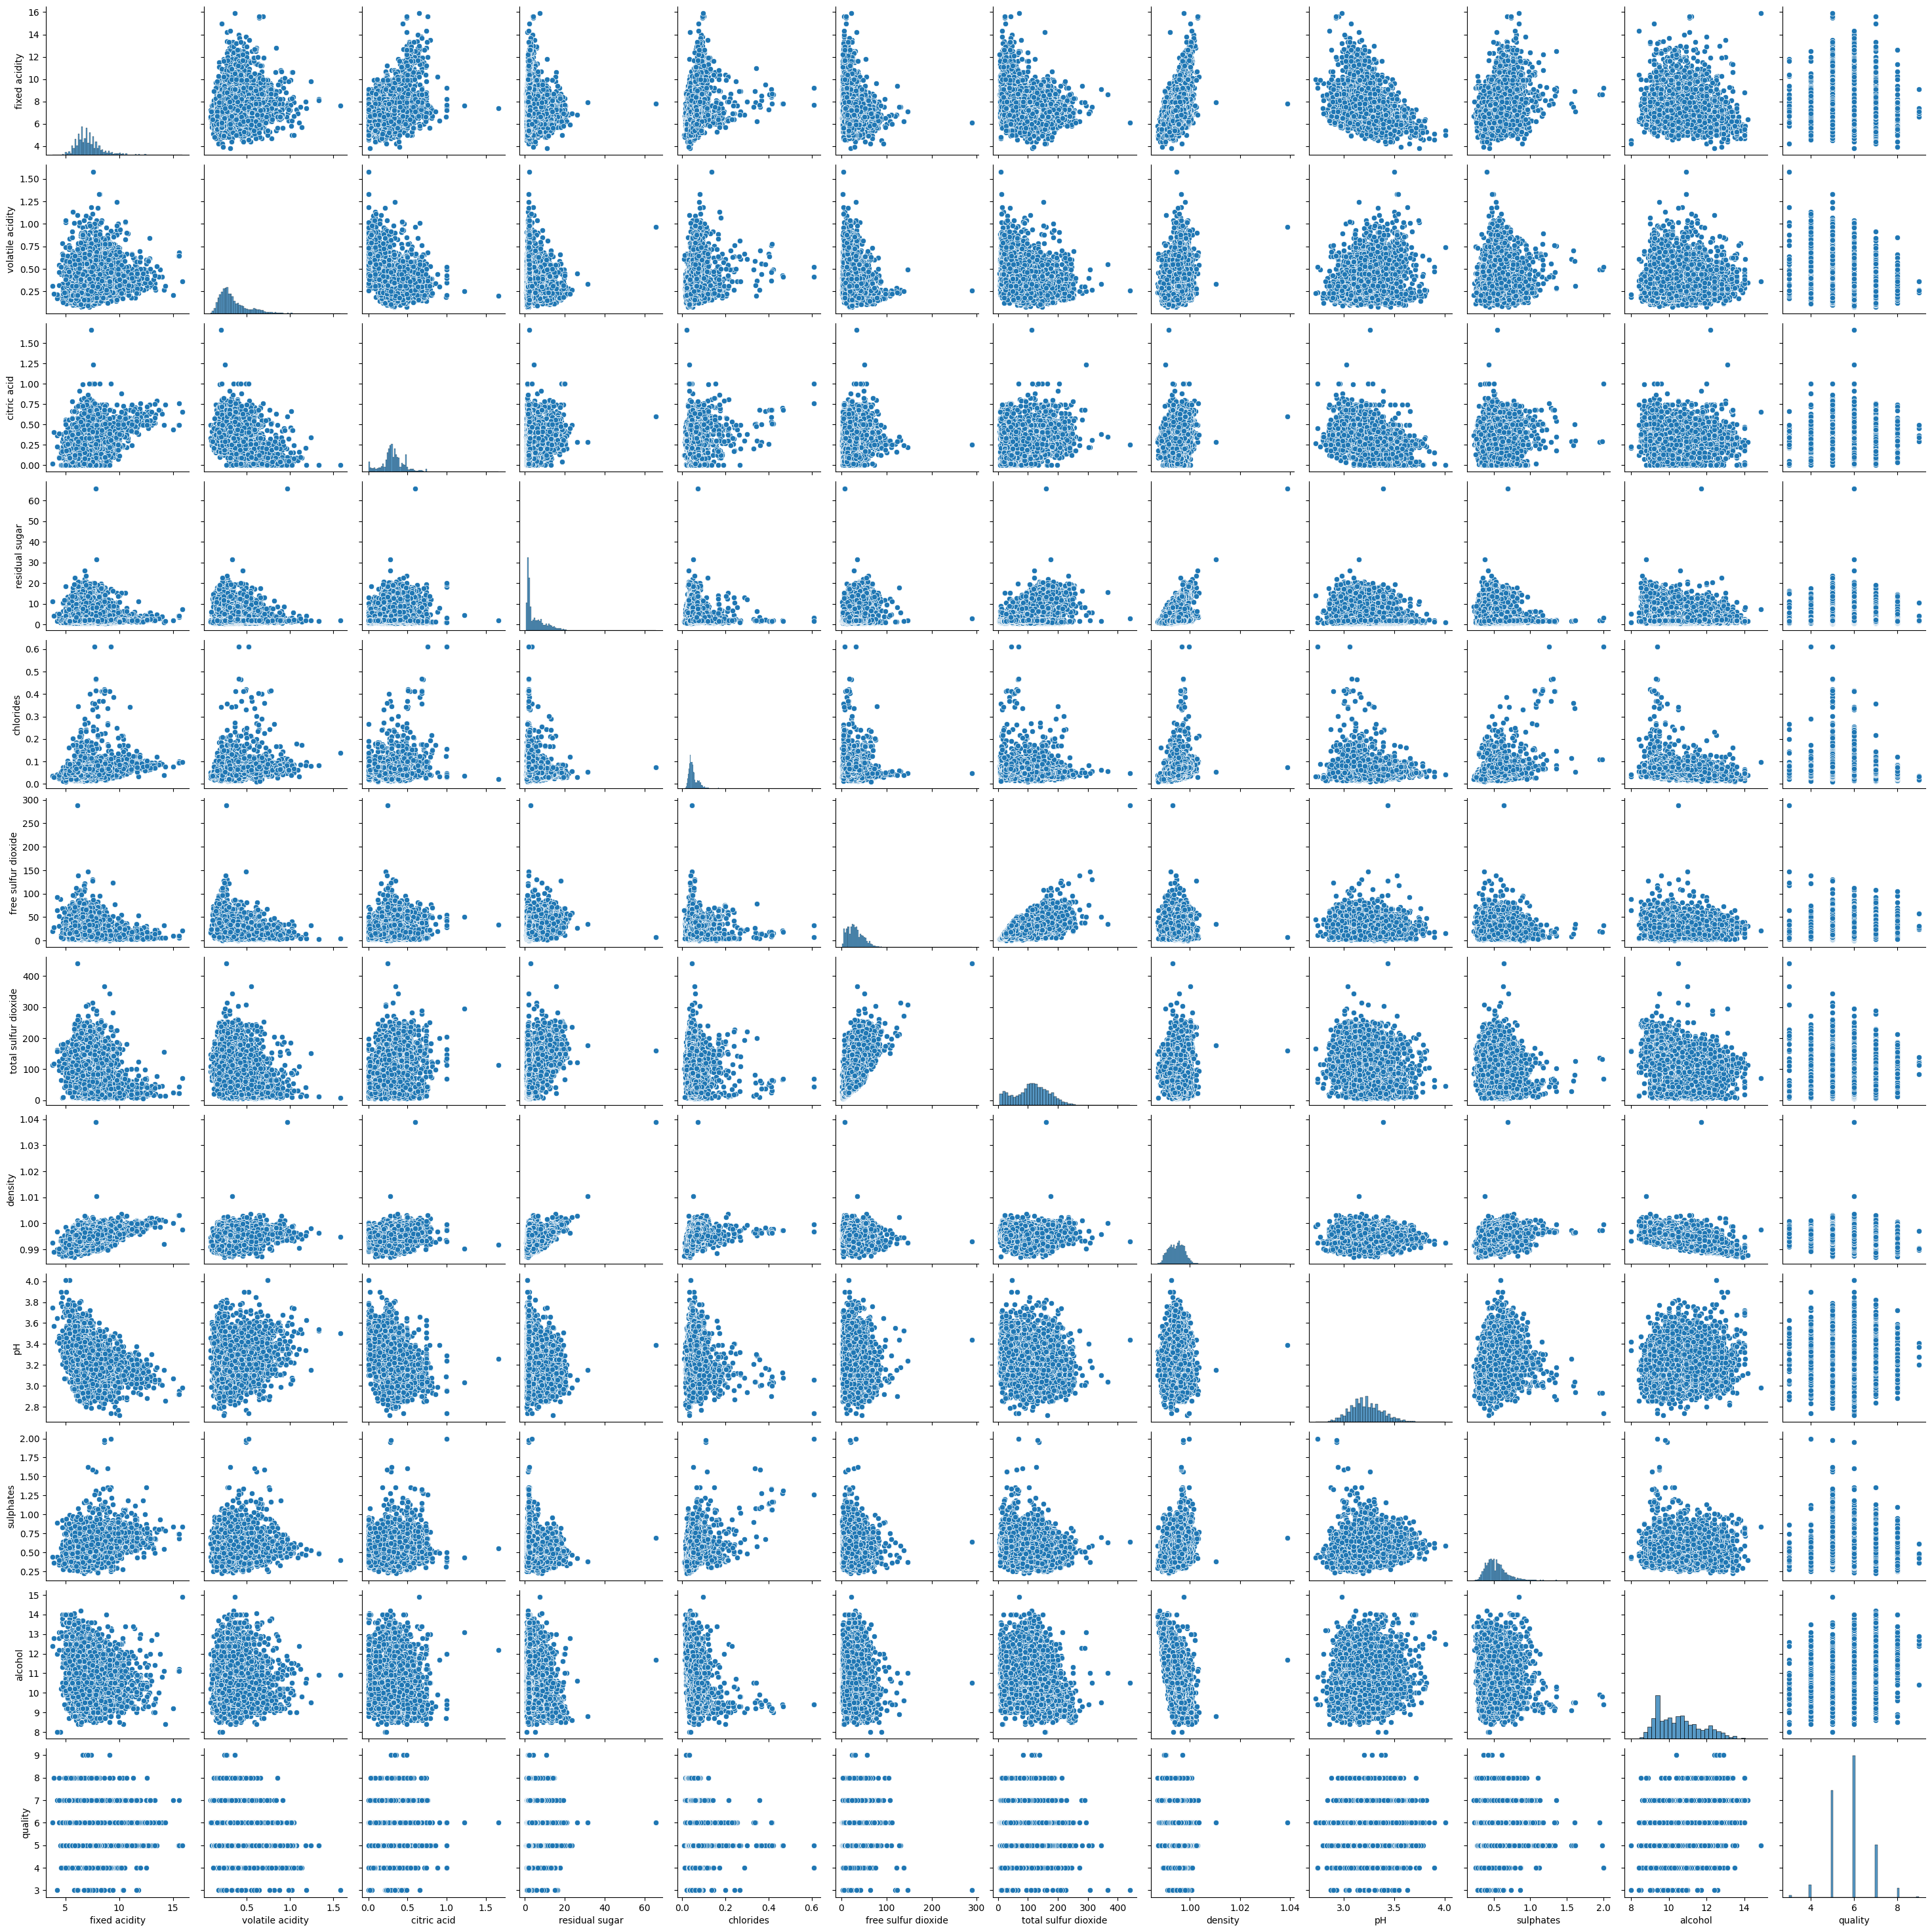

In [ ]:
sns.pairplot(df) #Показывает отношения между всеми парами переменных

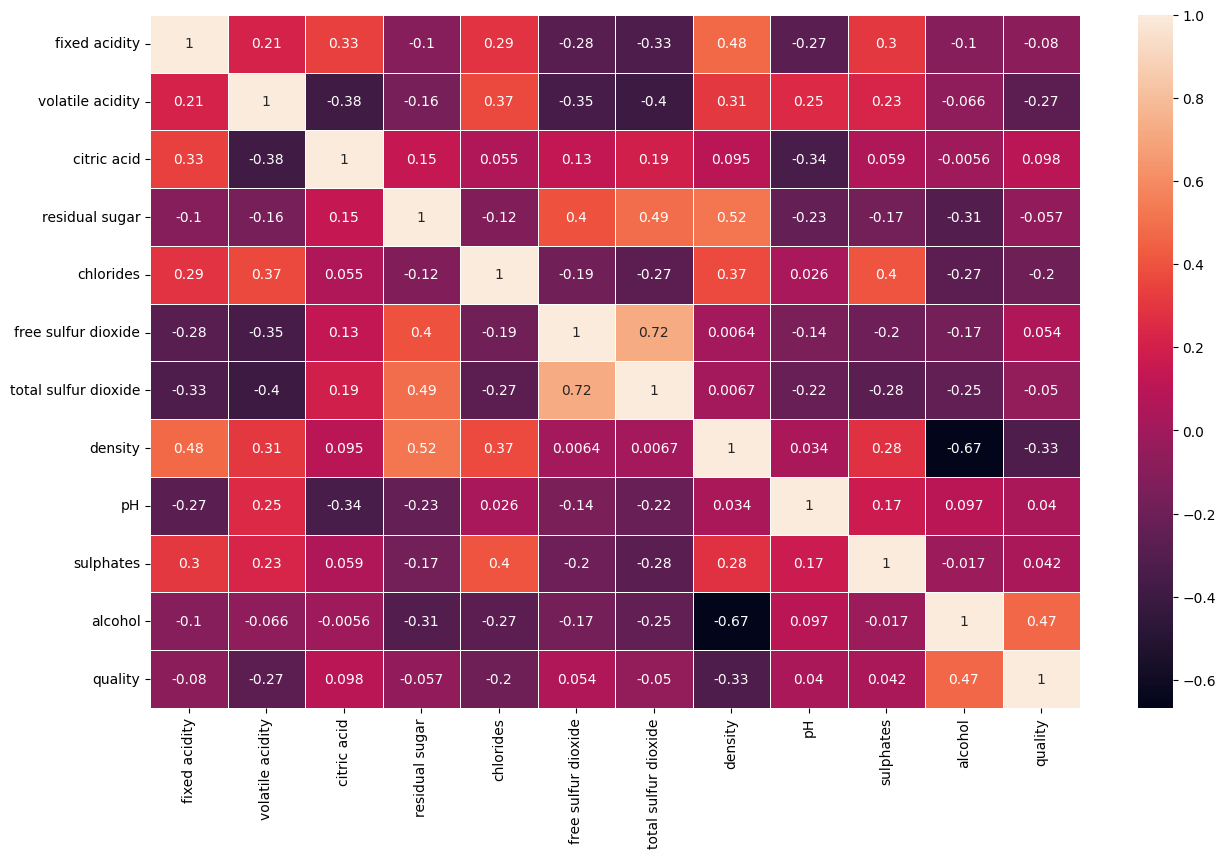

In [ ]:
plt.figure(figsize=(15,9))
df_num = df.select_dtypes(include=['float', 'int'])
sns.heatmap(df.corr(), annot=True, linewidth=.5)
plt.show


features = [
    'volatile acidity',
    'chlorides',
]

In [ ]:
df.drop('total sulfur dioxide', axis=1, inplace=True) # высокая корреляция

# Посмотрим на выбросы

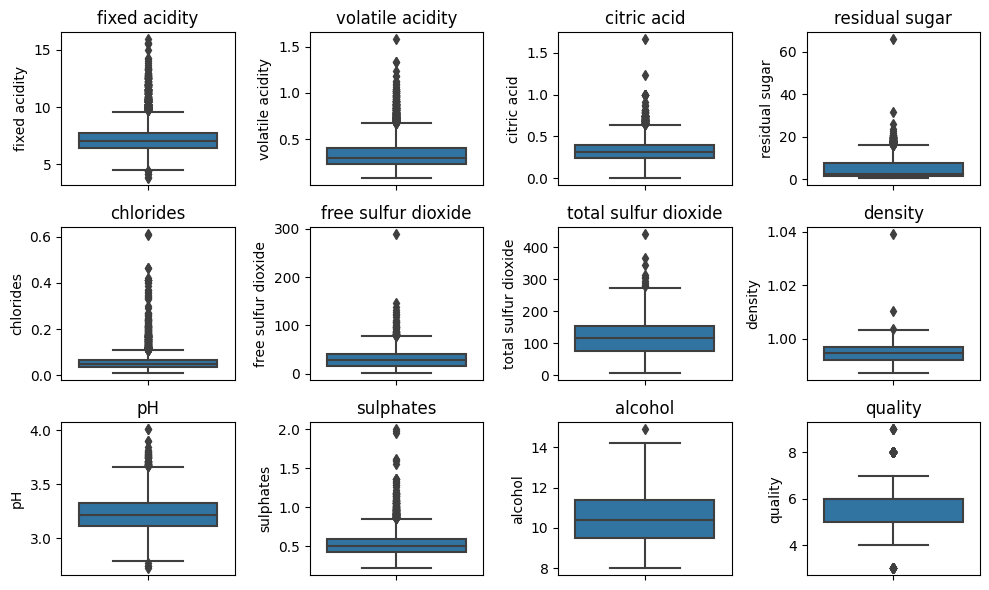

In [ ]:
plt.figure(figsize=(10, 6))

for i, column in enumerate(df_num.columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df_num, y=column)
    plt.title(column)

plt.tight_layout()
plt.show()

In [ ]:
features = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide','density',
    'pH', 'sulphates', 'alcohol', 'quality',
]
outliers = df

Q1 = outliers.quantile(0.25)
Q3 = outliers.quantile(0.75)
IQR = Q3-Q1
df = outliers[~((outliers < (Q1 - 1.5 * IQR)) |(outliers > (Q3 + 1.5 * IQR))).any(axis=1)]

В результате избавления от выбросов, данные не сильно изменились

In [ ]:
Yr = df['quality']
Xr = df.drop(["quality"], axis = 1)
Xr.shape, Yr.shape

((4081, 10), (4081,))

In [ ]:
Xr_train, Xr_test, Yr_train, Yr_test = train_test_split(Xr, Yr, test_size = 0.27, shuffle = True)

In [ ]:
Xr_train.shape, Yr_train.shape, Xr_test.shape, Yr_test.shape

((2979, 10), (2979,), (1102, 10), (1102,))

In [ ]:
pipe.fit(Xr_train, Yr_train).score(Xr_test, Yr_test)

0.5952813067150635

# Линейная регрессия

In [ ]:
lr = LinearRegression().fit(Xr_train, Yr_train)
Yr_prediction = lr.predict(Xr_test)
Yr_prediction = np.round(Yr_prediction)

In [ ]:
print(f'MAE: {mean_absolute_error(Yr_test, Yr_prediction)}')
print(f'MSE: {mean_squared_error(Yr_test, Yr_prediction)}')
print(f'RMSE: {sqrt(mean_squared_error(Yr_test, Yr_prediction))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(Yr_test, Yr_prediction))}')
print(f'R^2: {lr.score(Xr_test, Yr_prediction)}')

MAE: 0.44918330308529947
MSE: 0.4945553539019964
RMSE: 0.7032462967566885
MAPE: 0.28435800723190324
R^2: 0.6619641035554633


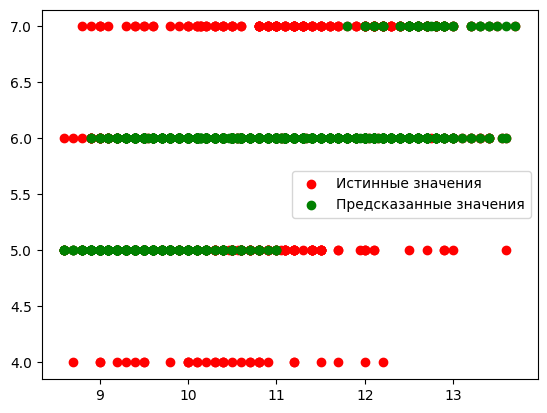

In [ ]:
plt.scatter(Xr_test["alcohol"], Yr_test, label='Истинные значения', color= 'red');
plt.scatter(Xr_test["alcohol"], np.round(lr.predict(Xr_test)), label='Предсказанные значения', color = 'green');
plt.legend();

# Ridge и Lasso


In [ ]:
parameters = {'alpha': np.arange(0, 1, 0.1)}

In [ ]:
ridge_optimal = GridSearchCV(Ridge(), parameters).fit(Xr_train, Yr_train) #Оптимальное значение параметров
ridge_optimal.best_params_

{'alpha': 0.0}

In [ ]:
lasso_optimal = GridSearchCV(Lasso(), parameters).fit(Xr_train, Yr_train)
lasso_optimal.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.198e+02, tolerance: 1.439e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.e

{'alpha': 0.0}

In [ ]:
ridge = Ridge(alpha = ridge_optimal.best_params_["alpha"]).fit(Xr_train, Yr_train)
Yr_prediction = ridge.predict(Xr_test)
print(f'MAE: {mean_absolute_error(Yr_test, Yr_prediction)}')
print(f'MSE: {mean_squared_error(Yr_test, Yr_prediction)}')
print(f'RMSE: {sqrt(mean_squared_error(Yr_test, Yr_prediction))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(Yr_test, Yr_prediction))}')
print(f'R^2: {lr.score(Xr_test, Yr_prediction)}')

MAE: 0.5080207112883798
MSE: 0.4058440001427294
RMSE: 0.6370588670937164
MAPE: 0.3016642700496692
R^2: 1.0


In [ ]:
lasso = Lasso(alpha = lasso_optimal.best_params_["alpha"]).fit(Xr_train, Yr_train)
Yr_prediction = lasso.predict(Xr_test)
print(f'MAE: {mean_absolute_error(Yr_test, Yr_prediction)}')
print(f'MSE: {mean_squared_error(Yr_test, Yr_prediction)}')
print(f'RMSE: {sqrt(mean_squared_error(Yr_test, Yr_prediction))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(Yr_test, Yr_prediction))}')
print(f'R^2: {lr.score(Xr_test, Yr_prediction)}')

MAE: 0.5080207112883791
MSE: 0.4058440001427287
RMSE: 0.6370588670937158
MAPE: 0.30166427004966884
R^2: 1.0


<ipython-input-65-4670249aee55>:1: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso = Lasso(alpha = lasso_optimal.best_params_["alpha"]).fit(Xr_train, Yr_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.524e+02, tolerance: 1.827e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordina

Оказалось, что Ridge и Lasso проявили себя идентично

# Elastic net

In [ ]:
parameters = {'alpha': np.arange(0, 10, 0.1)}
EN_optimal = GridSearchCV(ElasticNet(), parameters).fit(Xr_train, Yr_train)
EN_optimal.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.198e+02, tolerance: 1.439e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.e

{'alpha': 0.0}

In [ ]:
EN = ElasticNetCV().fit(Xr_train, Yr_train)
Yr_prediction = EN.predict(Xr_test)
print(f'MAE: {mean_absolute_error(Yr_test, Yr_prediction)}')
print(f'MSE: {mean_squared_error(Yr_test, Yr_prediction)}')
print(f'RMSE: {sqrt(mean_squared_error(Yr_test, Yr_prediction))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(Yr_test, Yr_prediction))}')
print(f'R^2: {lr.score(Xr_test, Yr_prediction)}')

MAE: 0.51209951423145
MSE: 0.40804021383280614
RMSE: 0.638780254729908
MAPE: 0.30288699199570623
R^2: 0.9876204027991174


# Полиномиальная регрессия

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

p = PolynomialFeatures(3)
Xr_p = p.fit_transform(Xr)

In [ ]:
lr2 = LinearRegression().fit(Xr_p, Yr)

In [ ]:
Yr_prediction = lr2.predict(Xr_p)
print(f'MAE: {mean_absolute_error(Yr, Yr_prediction)}')
print(f'MSE: {mean_squared_error(Yr, Yr_prediction)}')
print(f'RMSE: {sqrt(mean_squared_error(Yr, Yr_prediction))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(Yr, Yr_prediction))}')
print(f'R^2: {lr2.score(Xr_p, Yr)}')

MAE: 0.4771737269148928
MSE: 0.3530391477894514
RMSE: 0.5941709752162684
MAPE: 0.29144573816135755
R^2: 0.41148748396300583


# Вывод

Я провёл анализ данных EDA, где поработал с различными характеристиками вина. Я нормализовал и разделил данные на обучающие и тестовые.

После этого я обучил такие модели регрессии как: простая линейная регрессия, Ridge, Lasso, а также Elastic net и полиномиальная регрессия. Лучшими оказались Ridge и Lasso.